In [2]:
%pwd

'c:\\Users\\CARNOT\\customer segmentation\\customer_segmentation\\notebooks'

In [1]:
%cd "c:\Users\CARNOT\customer segmentation\customer_segmentation"

c:\Users\CARNOT\customer segmentation\customer_segmentation


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import json
from sklearn.preprocessing import PowerTransformer
from pprint import pprint

from warnings import filterwarnings


plt.style.use("seaborn-dark")
filterwarnings("ignore")
%matplotlib inline


In [3]:
with open("params.yaml") as f:
    config = yaml.safe_load(f)
config

{'random_state': 234,
 'data_loader': {'raw_data': 'data/raw/CC GENERAL.csv',
  'processed_data': 'data/processed/processed_data.csv'},
 'metadata': 'docs/metadata.json',
 'train': {'hypar_tuning': 17, 'n_cluster': 3},
 'report': {'metrics': {'hyper_metrics': 'reports/metrics/hyperpam_metrics.json',
   'feature_importance': 'reports/metrics/feature_importance.json'},
  'visual': {'no_clustersvsinertia': 'reports/figures/no_Clusters_vs_Inertia.jpg',
   'no_clustersvssilhouette': 'reports/figures/no_Clusters_vs_silhouette.jpg',
   'feature_importance': 'reports/figures/feature_importance.jpg'}}}

In [4]:
df = pd.read_csv(config["data_loader"]["raw_data"], index_col="CUST_ID")

In [5]:
print(df.head())

             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

    

In [6]:
with open(config["metadata"]) as f:
    metadata = json.load(f)
pprint(metadata)

{'BALANCE': 'Balance amount left in their account to make purchase',
 'BALANCEFREQUENCY': 'How frequently the balance is updated, score between 0 '
                     'and 1 (1= frequently updated, 0 =not frequently updated)',
 'CASHADVANCE': 'Cash in advance given by the user',
 'CASHADVANCEFREQUENCY': 'How frequently the cash in advance being paid',
 'CASHADVANCETRX': 'Number of transactions made with cash in advanced',
 'CREDITLIMIT': 'Limit of credit card for user',
 'CUSTID': 'Identification of credit card holder',
 'INSTALLMENTSPURCHASES': 'Amount of purchase done in installment',
 'MINIMUM_PAYMENTS': 'Minimum amount of payments made by user',
 'ONEOFFPURCHASES': 'Maximum purchase amount done in one-go',
 'ONEOFFPURCHASESFREQUENCY': 'How frequently purchases are happening in one-go '
                             '(1 = frequently pruchased 0=not frequently '
                             'purchased)',
 'PAYMENTS': 'Amount of payment done by user',
 'PRCFULLPAYMENT': 'Percent of f

In [24]:
df.shape

(8950, 17)

In [51]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                     int64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                   int64
ONEOFF_PURCHASES_FREQUENCY            int64
PURCHASES_INSTALLMENTS_FREQUENCY      int64
CASH_ADVANCE_FREQUENCY                int64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [56]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


def rounding(val):
    if val >= 0.5:
        return 1
    else: return 0

df["BALANCE_FREQUENCY"] = df["BALANCE_FREQUENCY"].apply(rounding)
df["PURCHASES_FREQUENCY"] = df["PURCHASES_FREQUENCY"].apply(rounding)
df["ONEOFF_PURCHASES_FREQUENCY"] = df["ONEOFF_PURCHASES_FREQUENCY"].apply(rounding)
df["PURCHASES_INSTALLMENTS_FREQUENCY"] = df["PURCHASES_INSTALLMENTS_FREQUENCY"].apply(rounding)
df["CASH_ADVANCE_FREQUENCY"] = df["CASH_ADVANCE_FREQUENCY"].apply(rounding)
df["PRC_FULL_PAYMENT"] = df["PRC_FULL_PAYMENT"] * 100

In [8]:
df["TENURE"].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [9]:
df.duplicated().sum()

0

In [6]:
df.fillna(0, inplace=True)

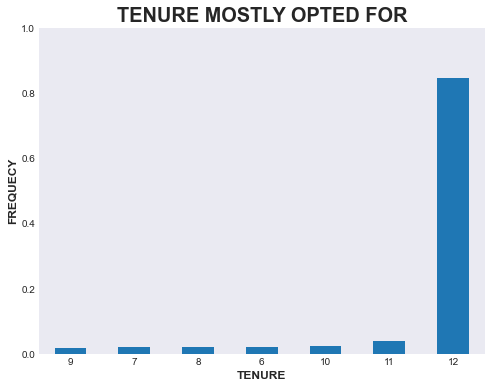

In [11]:
plt.figure(figsize=(8, 6))
(df["TENURE"]
.value_counts(normalize=True, ascending=True)
.plot.bar()
)
plt.xlabel("TENURE", size=12, weight="bold")
plt.ylabel("FREQUECY", size=12, weight="bold")
plt.title("TENURE MOSTLY OPTED FOR", size=20, weight="bold")
plt.xticks(rotation=0)
plt.ylim(0,1);

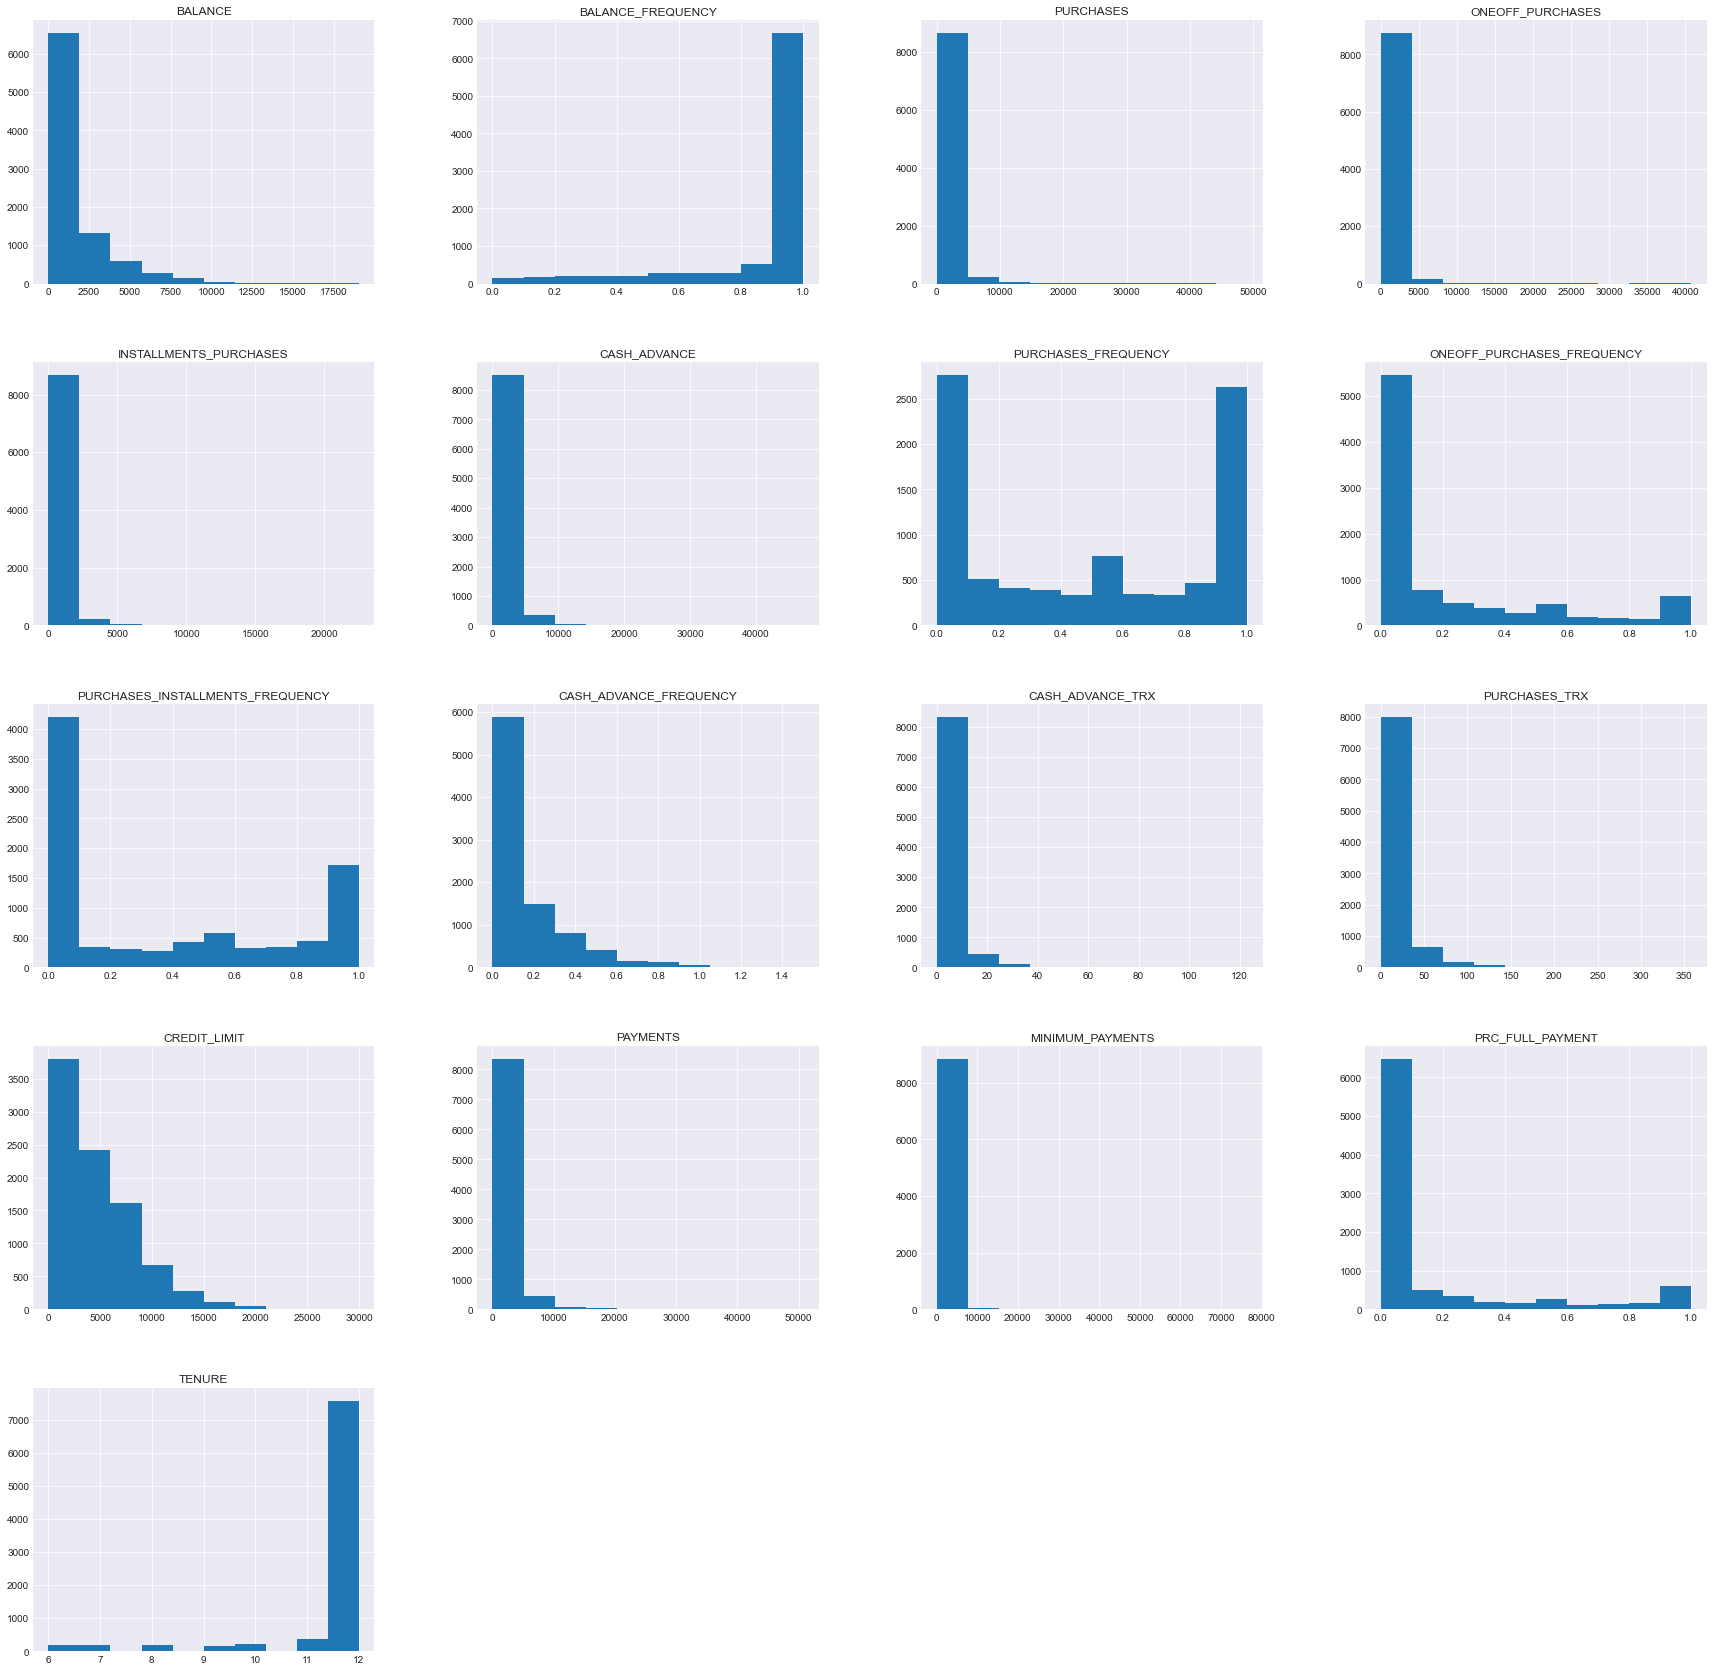

In [8]:
df.hist(figsize=(30,30));

In [9]:
transformer = PowerTransformer()

In [10]:
transformer.fit_transform(df)

array([[-1.23810255, -1.07934822, -0.3680498 , ..., -0.60548721,
        -0.67788891,  0.4222524 ],
       [ 1.05196103, -0.42493868, -1.5051492 , ...,  0.81751067,
         1.23502135,  0.4222524 ],
       [ 0.86061607,  0.62861188,  0.52165703, ...,  0.40121818,
        -0.67788891,  0.4222524 ],
       ...,
       [-1.40934942, -0.99132356, -0.21630032, ..., -0.90781062,
         1.32845486, -2.52661164],
       [-1.55853737, -0.99132356, -1.5051492 , ..., -1.11691177,
         1.32845486, -2.52661164],
       [-0.32431033, -1.6463113 ,  0.70202621, ..., -0.86965869,
        -0.67788891, -2.52661164]])

In [23]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,1,95.40,0.00,95.4,0.000000,0,0,0,0,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,1,0.00,0.00,0.0,6442.945483,0,0,0,0,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1,773.17,773.17,0.0,0.000000,1,1,0,0,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,1,1499.00,1499.00,0.0,205.788017,0,0,0,0,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1,16.00,16.00,0.0,0.000000,0,0,0,0,0,1,1200.0,678.334763,244.791237,0.000000,12


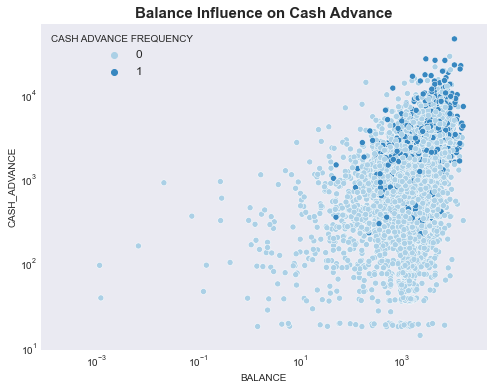

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="BALANCE", y="CASH_ADVANCE", hue="CASH_ADVANCE_FREQUENCY", palette="Blues")
plt.xscale("log")
plt.yscale("log")
plt.title("Balance Influence on Cash Advance", size=15, weight="bold")
plt.legend(loc="upper left", fontsize=12, markerscale=1, title="CASH ADVANCE FREQUENCY");

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

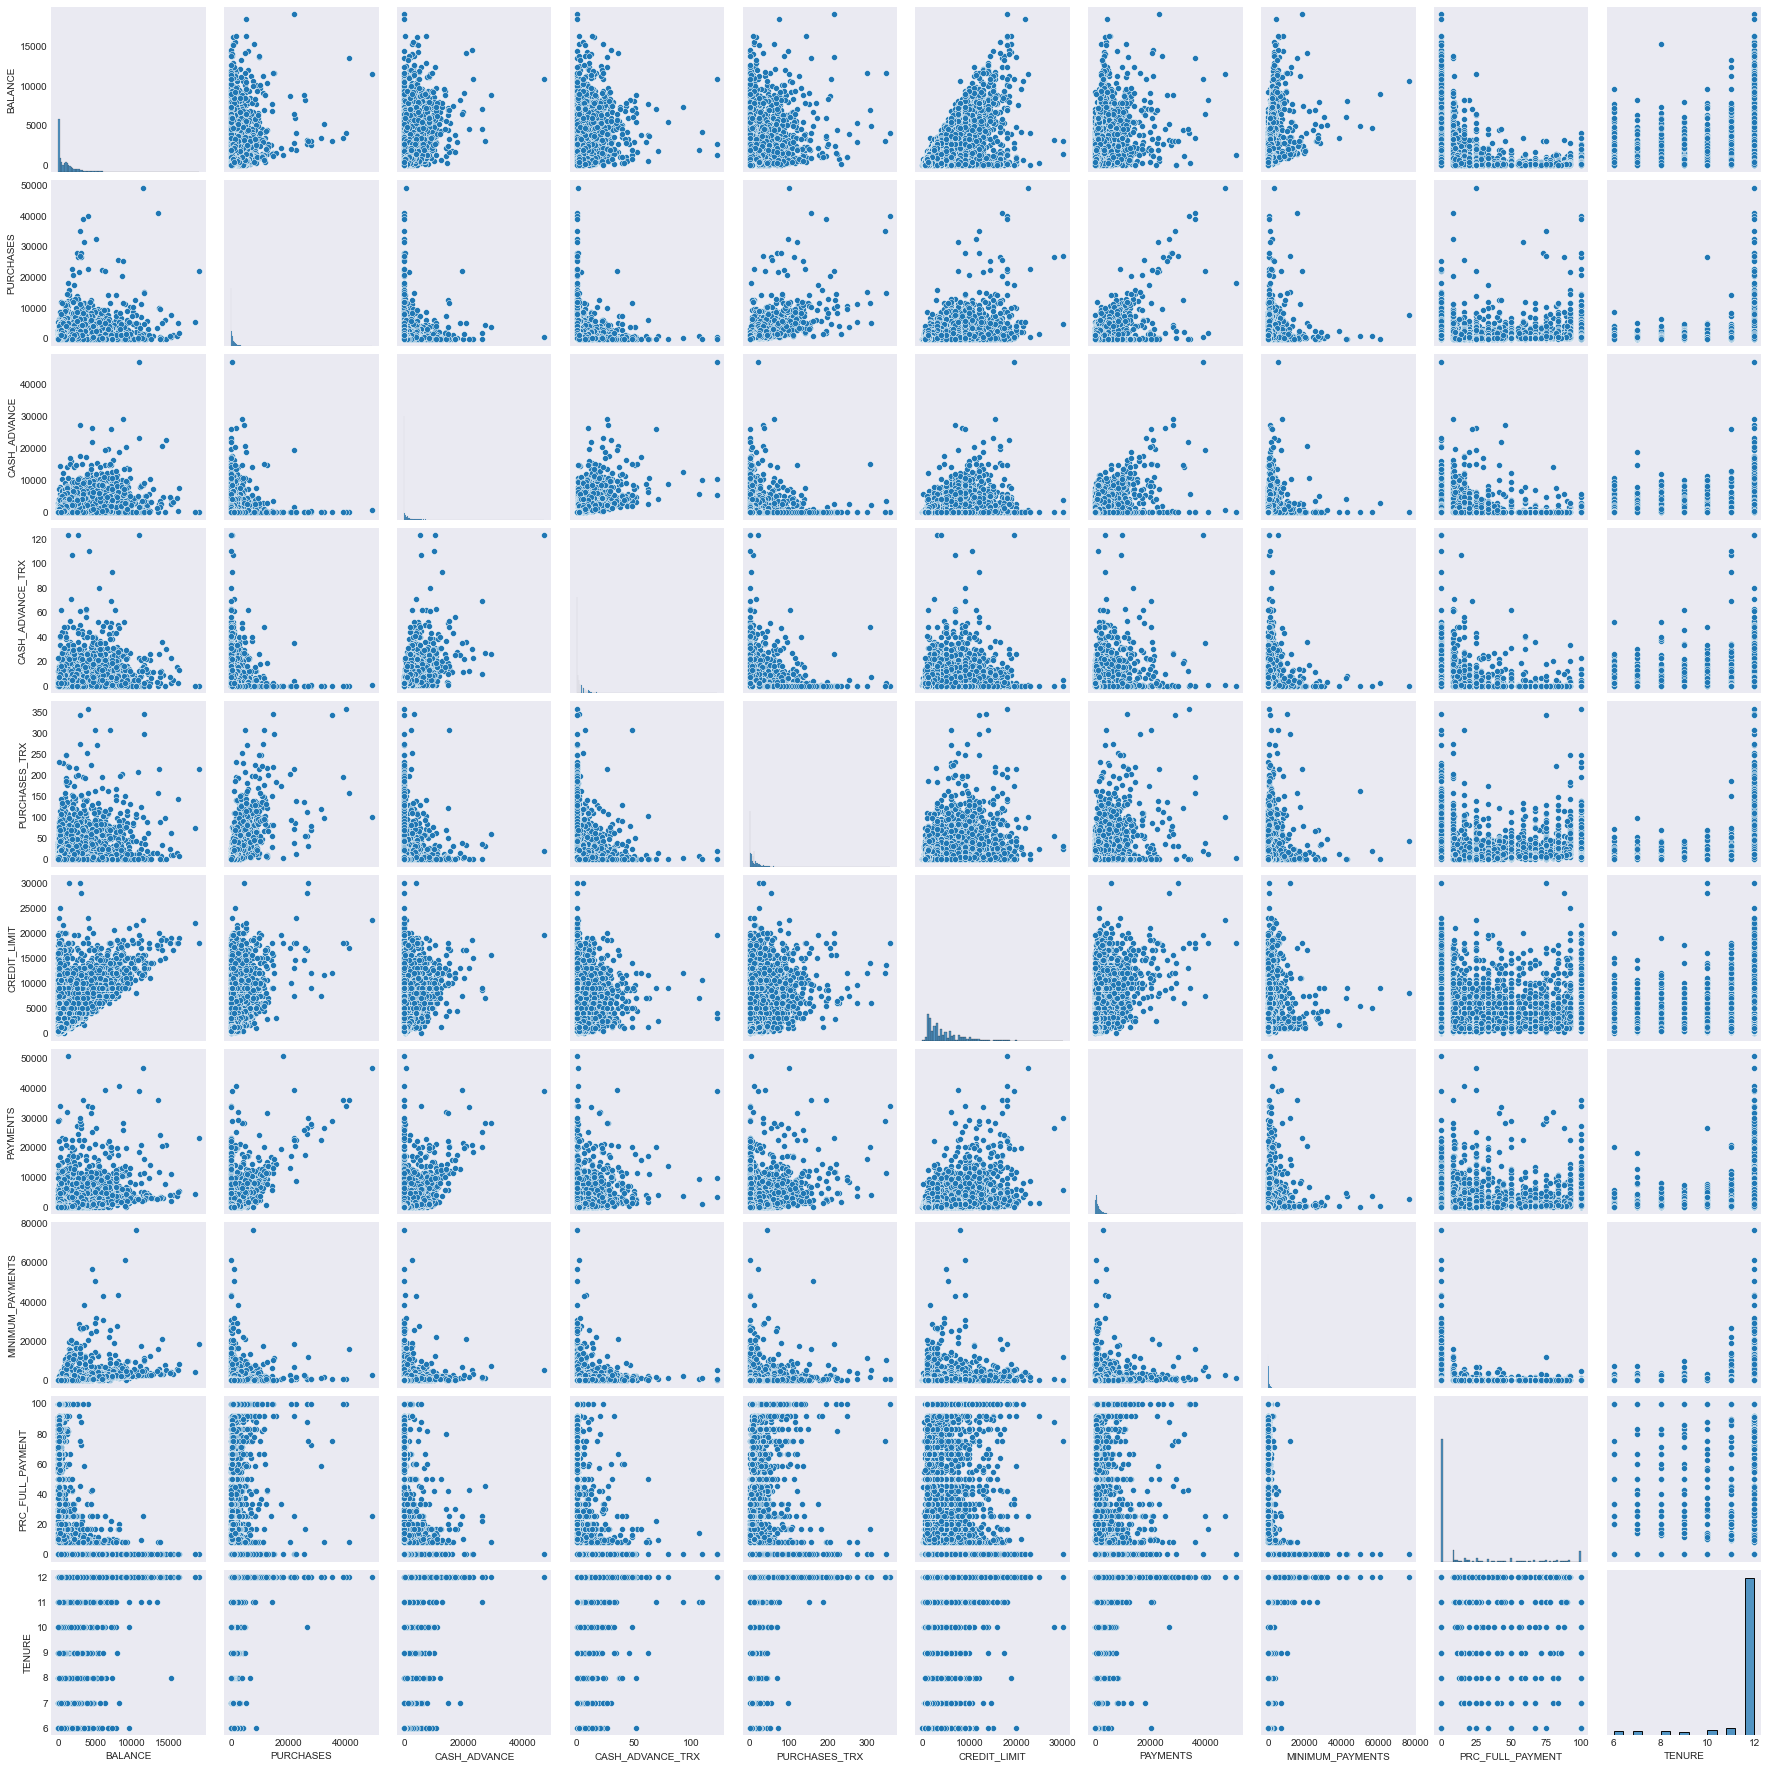

In [12]:
sns.pairplot(df, vars=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [8]:
purchase = df[df["PURCHASES_FREQUENCY"] == 1]

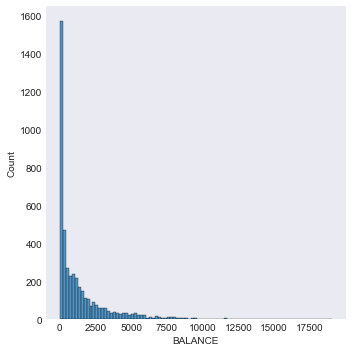

In [15]:
sns.displot(data=purchase, x="BALANCE")

In [37]:
purchase.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4542.0,1436.809012,2123.387438,0.0,100.407668,585.355816,1836.815120,19043.13856
BALANCE_FREQUENCY,4542.0,0.968956,0.173455,0.0,1.000000,1.000000,1.000000,1.00000
PURCHASES,4542.0,1733.661587,2718.381449,8.4,436.980000,939.045000,2049.602500,49039.57000
ONEOFF_PURCHASES,4542.0,968.265445,2161.905444,0.0,0.000000,278.490000,1136.157500,40761.25000
INSTALLMENTS_PURCHASES,4542.0,765.841008,1140.952386,0.0,194.160000,440.000000,938.667500,22500.00000
CASH_ADVANCE,4542.0,600.541858,1822.861945,0.0,0.000000,0.000000,228.044888,47137.21176
PURCHASES_FREQUENCY,4542.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,4542.0,0.347204,0.476134,0.0,0.000000,0.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4542.0,0.748569,0.433884,0.0,0.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,4542.0,0.054601,0.227226,0.0,0.000000,0.000000,0.000000,1.00000


In [40]:
purchase[purchase["BALANCE"] == 0].tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C18047,0.0,0,1027.92,0.0,1027.92,0.0,1,0,1,0,0,12,2500.0,1028.353304,13.395434,0.0,12
C18090,0.0,0,420.60,0.0,420.60,0.0,1,0,1,0,0,12,2000.0,382.210790,0.000000,0.0,12
C18148,0.0,0,136.80,0.0,136.80,0.0,1,0,1,0,0,12,2700.0,127.996550,0.000000,0.0,12
C18176,0.0,0,247.44,0.0,247.44,0.0,1,0,1,0,0,12,1500.0,317.354396,0.000000,0.0,12
C18205,0.0,0,631.20,0.0,631.20,0.0,1,0,1,0,0,12,4000.0,861.744611,0.000000,0.0,12
C18240,0.0,0,140.40,0.0,140.40,0.0,1,0,1,0,0,12,2200.0,124.992760,0.000000,0.0,12
C18268,0.0,0,271.56,0.0,271.56,0.0,1,0,1,0,0,12,2000.0,282.699746,0.000000,0.0,12
C18302,0.0,0,123.10,0.0,123.10,0.0,1,0,1,0,0,9,4000.0,101.639354,0.000000,0.0,12
C18311,0.0,0,152.28,0.0,152.28,0.0,1,0,1,0,0,12,4000.0,0.000000,0.000000,0.0,12


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

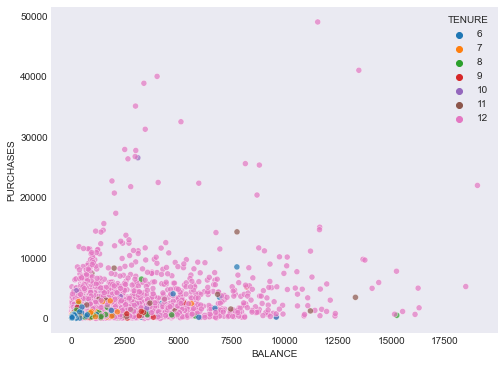

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(purchase["BALANCE"], purchase["PURCHASES"], hue=purchase["TENURE"], palette=sns.color_palette("tab10", 7), alpha=0.7)

In [9]:
purchase["pur_bal_ratio"] = purchase["BALANCE"] / purchase["PURCHASES"]

In [10]:
purchase["pur_bal_ratio"].describe()

count    4542.000000
mean        1.917779
std        10.375377
min         0.000000
25%         0.106995
50%         0.393723
75%         1.647874
max       495.016389
Name: pur_bal_ratio, dtype: float64

<AxesSubplot:>

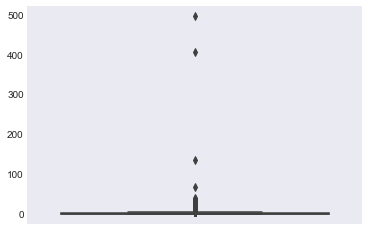

In [15]:
sns.boxplot(y=purchase["pur_bal_ratio"])

(0.0, 40.0)

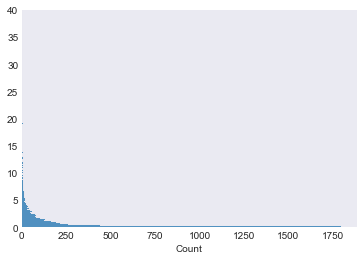

In [16]:
sns.histplot(y=purchase["pur_bal_ratio"])
plt.ylim(0, 40)

In [13]:
purchase["pay_bal_ratio"] = purchase["BALANCE"] / purchase["CREDIT_LIMIT"]

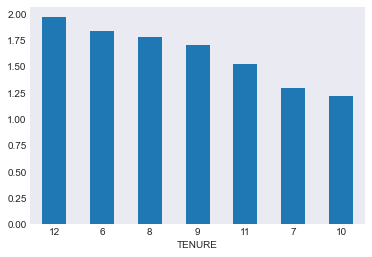

In [11]:
(purchase.groupby(df["TENURE"])["pur_bal_ratio"]
        .mean()
        .sort_values(ascending=False)
        .plot
        .bar()
)
plt.xticks(rotation=0);

<AxesSubplot:ylabel='pay_bal_ratio'>

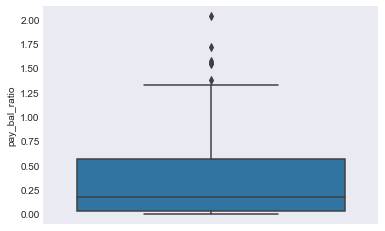

In [44]:
sns.boxplot(y=purchase["pay_bal_ratio"])

<AxesSubplot:xlabel='pay_bal_ratio', ylabel='Count'>

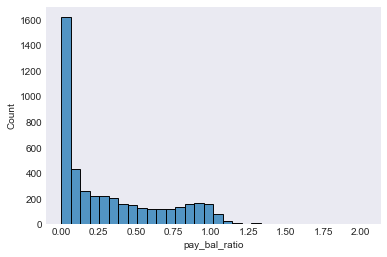

In [47]:
sns.histplot(x=purchase["pay_bal_ratio"])

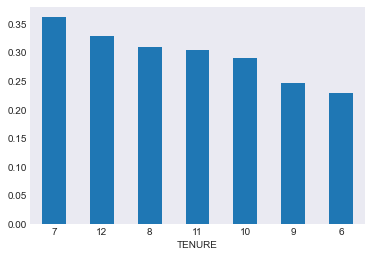

In [45]:
(purchase.groupby(df["TENURE"])["pay_bal_ratio"]
        .mean()
        .sort_values(ascending=False)
        .plot
        .bar()
)
plt.xticks(rotation=0);

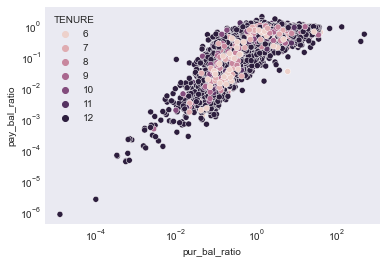

In [51]:
sns.scatterplot(purchase["pur_bal_ratio"], purchase["pay_bal_ratio"], purchase["TENURE"])
plt.xscale("log")
plt.yscale("log");